<a href="https://colab.research.google.com/github/pedro9bee/collab/blob/main/Transcri%C3%A7%C3%A3o_de_v%C3%ADdeos_do_YouTube_com_Whisper_(OpenAI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como baixar o áudio de um vídeo do YouTube

Esta primeira parte do tutorial foi criada por [Guilherme Felitti](https://staging.bsky.app/profile/gfelitti.bsky.social). [Marcelo Träsel](https://www.linkedin.com/in/marcelo-tr%C3%A4sel-a269687/) ajudou na criação deste passo a passo.

Para transcrever um áudio e baixar os arquivos (tanto da transcrição quanto da legenda, que possui os tempos), execute os seguintes passos:

- Copie esse notebook para seu Drive (menu "File" > "Save a copy in Drive");

- Com a sua cópia desse notebook aberta, feche essa versão.

- Na 2ª célula, coloque a URL do vídeo na variável link e a língua do vídeo na variável lingua com 2 caracteres.
  * Português é "pt", espanhol é "es" e inglês é "en".

- Rode as primeiras 4 células, a começar pela abaixo. Para rodar, clique na setinha no canto esquerdo de cada uma delas. Baixar o áudio demora um pouco mesmo.

- Quando acabar de baixar o áudio, verifique se o arquivo baixado do YouTube no passo anterior se encontra dentro da pasta “content”.

- Se estiver, rode a última célula. Ela vai transformar o áudio em texto. No fim, uma nova pasta chamada output-medium terá a transcrição. Transcrever o áudio demora um pouco mesmo.

- Quer transcrever um áudio no seu computador sem relação com o YouTube? Também dá.  Você pode fazer isso de 2 formas diferentes:

  - Clique no ícone de pasta Gerenciador de arquivos no canto esquerdo, depois no ícone de seta para cima Upload de arquivos e escolha o arquivo; ou

  - Clique no ícone de pasta no canto esquerdo Gerenciador de arquivos e arraste o arquivo para a área abaixo do ícone da pasta (onde a pasta sample_data está);

  - Coloque o nome do arquivo que deseja transcrever na célula de código ao fim do notebook: na primeira linha, “filename”, troque “arquivo” pelo nome do arquivo que se encontra na pasta “content”. Maiúsculas são diferentes de minúsculas; mantenha as aspas;



**Para baixar o áudio e as transcrições, clique no ícone de pasta aqui no canto esquerdo. Selecione o arquivo, clique com o botão direito e escolha Download. As transcrições estarão na pasta output-medium**

In [ ]:
!pip install yt-dlp openai-whisper==20231106 openai
!apt install -y ffmpeg

In [ ]:
link='https://www.youtube.com/watch?v=b1Uq6Ww_bDM'

if 'youtu.be' in link:
  arquivo=link.split('/')[-1]+".mp3"
  arquivo_edit=link.split('/')[-1]+"_edit.mp3"
else:
  arquivo=link.split('=')[-1]+".mp3"
  arquivo_edit=link.split('=')[-1]+"_edit.mp3"

lingua='pt'

In [ ]:
!yt-dlp -x -f bestaudio --audio-format mp3 -o "%(id)s.%(ext)s" $link

In [ ]:
!ffmpeg -i {arquivo} -vn -ab 320k -ar 44100 -y {arquivo_edit}

# Transcrição de textos em Português com whisper (OpenAI)

Esta segunda parte do tutorial foi criada por [Álvaro Justen](https://twitter.com/turicas).

Para transcrever um áudio e baixar os arquivos (tanto da transcrição quanto da legenda, que possui os tempos), execute os seguintes passos:
1. Copie esse notebook para seu Drive (menu "File" > "Save a copy in Drive");
1. Com a sua cópia desse notebook aberta, feche essa versão e suba o arquivo de áudio que deseja transcrever. Você pode fazer isso de 2 formas diferentes:
  - Clique no ícone de pasta 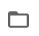 no canto esquerdo, depois no ícone de seta para cima 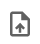 e escolha o arquivo; ou
  - Clique no ícone de pasta no canto esquerdo 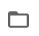 e arraste o arquivo para a área abaixo do ícone da pasta (onde a pasta `sample_data` está);
1. Coloque o nome do arquivo que deseja transcrever na célula de código ao fim do notebook: troque `nome do arquivo.mp3` pelo nome do arquivo que você fez upload no passo anterior. Maiúsculas são diferentes de minúsculas; mantenha as aspas;
1. Escolha um dos modelos disponíveis (mais detalhes abaixo) e edite a célula de código, trocando `medium` pelo modelo desejado. Mantenha as aspas. Maiúsculas são diferentes de minúsculas; mantenha as aspas. O modelo `small` costuma ter boa acurácia com baixo tempo de processamento;
1. Clique no botão *play* 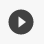 que fica no canto superior esquerdo da célula de código;
1. Aguarde o código terminar de executar - o botão *play* vira *stop* durante a execução e volta a ser *play* quando ela termina, precedido pelo tempo que o código demorou para executar. 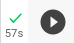
1. Abra o gerenciador de arquivos 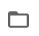 e procure por uma pasta que começa com "output". Lá estarão os arquivos da transcrição em vários formatos (`.txt` é apenas o texto, `.vtt` e `.srt` é legenda, com os tempos). Baixe os que desejar clicando nos três pontos 2023-03-28_09-36.png e depois na opção "Download".
1. Depois de um tempo o notebook "desconecta" e todos os arquivos (tanto os que você enviou quanto os que foram gerados) se perdem. Baixe as transcrições tão logo o processo finalize para não perdê-las.


## Modelos disponíveis

Você pode escolher qual o tamanho de modelo deseja usar. Os tamanhos impactam na qualidade do resultado e no tempo de processamento (quanto melhor a qualidade, mais tempo de processamento). A escolha entre eles também está à qualidade do áudio: se poluído com ruídos, provavelmente será necessário um modelo com maior qualidade para conseguir transcrever corretamente.

A lista de possíveis modelos é, do mais rápido para o fim o maior qualidade:

- tiny
- base
- small
- medium
- large


## Acelerando a execução do código

A execução desse modelo é bem mais rápida em uma GPU. Você pode tentar usar uma GPU gratuitamente aqui no Colab clicando no menu "Runtime" > "Change runtime type". Depois disso, selecione "GPU" em "Hardware Accelerator":

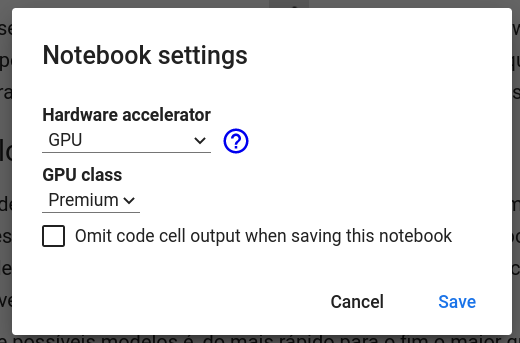

> Nota: caso você esteja utilizando a versão gratuita do Colab a opção "GPU class" não estará habilitada e a disponibilidade de GPUs não é garantida.

In [ ]:
import subprocess

filename = arquivo_edit

model_name = "medium"
subprocess.run(
  [
    "whisper",
    "--language", lingua,
    "--word_timestamps", "True",
    "--model", model_name,
    "--output_dir", f"output-{model_name}",
    filename
  ]
)

In [ ]:
!zip -r output.zip output-medium